<a id=start></a>
# № 1 Учебный Проект → «Музыка Больших Городов» 🎹  

#### `2022-06-24`, спринт → `Базовый Python`

На данных **Яндекс.Музыки** сравним поведение пользователей двух столиц.

**Цель исследования** — проверим три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. [Обзор данных](#intro)
 2. [Предобработка данных](#preprocess)
 3. [Проверка гипотез](#analytics)



## Обзор данных <a id=intro></a>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  statistics import median, mode, mean

In [2]:
sns.set_style('white')
plt.rcParams['figure.dpi'] = 96
plt.rcParams['savefig.dpi'] = 96

In [3]:
try:
    df = pd.read_csv('../01_project/datasets/yandex_music_project.csv')
    print('FYI dataset loaded from local file')    
except FileNotFoundError:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_music_project.csv')
    print('FYI dataset loaded from internet')

FYI dataset loaded from local file


In [4]:
display(df.head(10))

userID                        Track            artist   genre  \
0  FFB692EC            Kamigata To Boots  The Mass Missile    rock   
1  55204538  Delayed Because of Accident  Andreas Rönnberg    rock   
2    20EC38            Funiculì funiculà       Mario Lanza     pop   
3  A3DD03C9        Dragons in the Sunset        Fire + Ice    folk   
4  E2DC1FAE                  Soul People        Space Echo   dance   
5  842029A1                    Преданная         IMPERVTOR  rusrap   
6  4CB90AA5                         True      Roman Messer   dance   
7  F03E1C1F             Feeling This Way   Polina Griffith   dance   
8  8FA1D3BE     И вновь продолжается бой               NaN  ruspop   
9  E772D5C0                    Pessimist               NaN   dance   

             City        time        Day  
0  Saint-Petersburg  20:28:33  Wednesday  
1            Moscow  14:07:09     Friday  
2  Saint-Petersburg  20:58:07  Wednesday  
3  Saint-Petersburg  08:37:09     Monday  
4            Moscow  08:34:34     Monday  
5  Saint-Petersburg  13:09:41     Friday  
6            Moscow  13:00:07  Wednesday  
7            Moscow  20:47:49  Wednesday  
8            Moscow  09:17:40     Friday  
9  Saint-Petersburg  21:20:49  Wednesday

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB
None


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Неинформативные названия:
  1. `time` — пусть будет `start_time`.
  2. `Track` — пусть будет `track_title`



Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных <a id=preprocess></a>

* исправим заголовки столбцов;
* исключим пропуски данных;
* проверим данные на дубликаты;

### Стиль заголовков
Посмотрим на названия столбцов **до редактирования**:

In [6]:
print(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


Приведём названия в соответствие «хорошему» стилю:
* применим «змеиный_регистр»;
* все символы сделаем строчными;
* устраним пробелы;
* добавим информативности;

Для этого переименуем колонки:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track_title'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`;
* `'time'` → `'start_time'`;

In [7]:
df.rename({
            '  userID': 'user_id',
            'Track': 'track_title',
            '  City  ': 'city',
            'Day': 'day',
            'time': 'start_time'
        },
        axis='columns',
        inplace=True
)

Посмотрим на названия столбцов **после редактирования**:

In [8]:
print(df.columns)

Index(['user_id', 'track_title', 'artist', 'genre', 'city', 'start_time',
       'day'],
      dtype='object')


посмотрим первые 10 строк df

In [9]:
display(df.head(10))

user_id                  track_title            artist   genre  \
0  FFB692EC            Kamigata To Boots  The Mass Missile    rock   
1  55204538  Delayed Because of Accident  Andreas Rönnberg    rock   
2    20EC38            Funiculì funiculà       Mario Lanza     pop   
3  A3DD03C9        Dragons in the Sunset        Fire + Ice    folk   
4  E2DC1FAE                  Soul People        Space Echo   dance   
5  842029A1                    Преданная         IMPERVTOR  rusrap   
6  4CB90AA5                         True      Roman Messer   dance   
7  F03E1C1F             Feeling This Way   Polina Griffith   dance   
8  8FA1D3BE     И вновь продолжается бой               NaN  ruspop   
9  E772D5C0                    Pessimist               NaN   dance   

               city start_time        day  
0  Saint-Petersburg   20:28:33  Wednesday  
1            Moscow   14:07:09     Friday  
2  Saint-Petersburg   20:58:07  Wednesday  
3  Saint-Petersburg   08:37:09     Monday  
4            Moscow   08:34:34     Monday  
5  Saint-Petersburg   13:09:41     Friday  
6            Moscow   13:00:07  Wednesday  
7            Moscow   20:47:49  Wednesday  
8            Moscow   09:17:40     Friday  
9  Saint-Petersburg   21:20:49  Wednesday

Так-то лучше ✨

### Пропуски значений

Посмотрим, сколько в таблице пропущенных значений:

In [10]:
display(df.isna().sum())

user_id           0
track_title    1231
artist         7203
genre          1198
city              0
start_time        0
day               0
dtype: int64

**7203** потерянных артиста 😱

Хорошо, что пропуски в `track_title` и `artist` не так важны для нашего исследования. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями `unknown`;
* оценить, насколько они повредят расчётам; 

In [11]:
columns_to_replace = ('track_title', 'artist', 'genre')

for col in columns_to_replace:
    df[col].fillna(value='unknown', inplace=True)

Убедимся, что в таблице не осталось пропусков.

In [12]:
display(df.isna().sum())

user_id        0
track_title    0
artist         0
genre          0
city           0
start_time     0
day            0
dtype: int64

То что нужно 👌

### Дубликаты


Поссчитаем явные дубликаты.

In [13]:
print('Одинаковых строк в наборе данных:', df.duplicated().sum())

Одинаковых строк в наборе данных: 3826


+ удаленим явные дубликаты
+ удалим старые индексы и сформируем новые

In [14]:
df.drop_duplicates(inplace=True, ignore_index=True)

посмотрим на соответствие индексов

In [15]:
display(df.tail(1))
display(df.shape)

user_id                track_title        artist    genre    city  \
61252  3A64EF84  Tell Me Sweet Little Lies  Monica Lopez  country  Moscow   

      start_time     day  
61252   21:59:46  Friday

(61253, 7)

посмотрим на соответствие индексов

In [16]:
display(df.tail(1))
display(df.shape)

user_id                track_title        artist    genre    city  \
61252  3A64EF84  Tell Me Sweet Little Lies  Monica Lopez  country  Moscow   

      start_time     day  
61252   21:59:46  Friday

(61253, 7)

Всё исчезло не осталось и следа…

Шестьдесят один двести пятьдесят двааа

🎤

подсчёт явных дубликатов

In [17]:
display(df.duplicated().sum())

0

Не будем повторять дважды)  

Поищем неявные дубликаты в столбце `'genre'`:
+ посмотрим уникальные названия жанров

In [18]:
display(df['genre'].sort_values().unique())

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

количество уникальных названий жанров

In [19]:
print('Количество уникальных названий жанров:', len(df['genre'].sort_values().unique()))

Количество уникальных названий жанров: 290


Погуглил и решил заменить:

|«Клон»                         |Оригинал       |
|:--------------------------    |:------------  |
| `'africa'`                    | `'afrikaans'` |
| `'deutschspr'`                | `'german'`    |
| `'электроника'`               | `'electronic'`|
| `'folklore'`                  | `'folk'`      |
| `'frankreich', 'französisch'` | `'french'`    |
| `'neue'`                      | `'new'`       |
| `'poprussian'`                | `'ruspop'`    |
| `'türk', 'türkçe'`            | `'turkish'`   |
| `'hip', 'hip-hop', 'hop'`     | `'hiphop'`    |
    
    ну да-да — hip-hop не гуглил)

А что делать с этими, лучше спросить у колег или Артемия Троицкого:
* `'ïîï'`
* `'animated', 'anime'`
* `'soul', 'soulful'`

In [20]:
genres_correction = (
    (('africa',), 'afrikaans'),
    (('deutschspr',), 'german'),
    (('электроника',), 'electronic'),
    (('folklore',), 'folk'),
    (('frankreich', 'französisch',), 'french',),
    (('hip', 'hip-hop', 'hop',), 'hiphop'),
    (('neue',), 'new'),
    (('poprussian',), 'ruspop'),
    (('türk', 'türkçe',), 'turkish'),
)

In [21]:
def replace_wrong_genres(data_frame, wrong_genres, correct_genre):
    '''Функция для замены неявных дубликатов в  колонке `genre`
        `data_frame` — набор данных
        `wrong_genres` — список жанров которые меняем
        `correct_genre` — корректный жанр которыми заменяем'''
    for wrong_genre in wrong_genres:
        data_frame['genre'].replace(to_replace=wrong_genre, value=correct_genre, inplace=True)

устраним неявные дубликаты

In [22]:
for genre_correction in genres_correction:
    replace_wrong_genres(data_frame=df,
                         wrong_genres=genre_correction[0],
                         correct_genre=genre_correction[1])

посмотрим уникальные названия жанров

In [23]:
display(df['genre'].sort_values().unique())

array(['acid', 'acoustic', 'action', 'adult', 'afrikaans', 'alternative',
       'alternativepunk', 'ambient', 'americana', 'animated', 'anime',
       'arabesk', 'arabic', 'arena', 'argentinetango', 'art', 'audiobook',
       'author', 'avantgarde', 'axé', 'baile', 'balkan', 'beats',
       'bigroom', 'black', 'bluegrass', 'blues', 'bollywood', 'bossa',
       'brazilian', 'breakbeat', 'breaks', 'broadway', 'cantautori',
       'cantopop', 'canzone', 'caribbean', 'caucasian', 'celtic',
       'chamber', 'chanson', 'children', 'chill', 'chinese', 'choral',
       'christian', 'christmas', 'classical', 'classicmetal', 'club',
       'colombian', 'comedy', 'conjazz', 'contemporary', 'country',
       'cuban', 'dance', 'dancehall', 'dancepop', 'dark', 'death', 'deep',
       'deutschrock', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat',
       'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy',
       'electronic', 'electropop', 'emo', 'entehno', 'epicmetal',
       'estrada', '

In [24]:
print(
    'Количество уникальных названий жанров:',
    len(df['genre'].sort_values().unique())
)

Количество уникальных названий жанров: 278


Похоже, что с hiphop всё тип-топ.

**Выводы**

Предобработкой нашли три проблемы в данных:

- нарушения в стиле заголовков;
- пропущенные значения;
- дубликаты — явные и неявные;

Чтобы упростить работу с таблицей исправили:
- заголовки привели к единому стилю
- пропущенные значения заменили на `'unknown'`, но ещё предстоит увидеть, как повлияют эти замены в колонке `genre` на исследование.
- устранили дубликаты — явные и неявные;


Теперь можно перейти к проверке гипотез. 🚀

## Проверка гипотез <span id=analytics></span>

### Сравнение поведения пользователей двух столиц

**Гипотеза № 1**

> Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.

> Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт- Петербурге. Проверьте это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:
>
> * Разделите пользователей Москвы и Санкт-Петербурга
> * Сравните, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


Проверим точно ли два города, а то может «Питер» где затесался

In [25]:
print(df['city'].unique())

['Saint-Petersburg' 'Moscow']


❤️

посмотрим какие дни недели в данных

In [26]:
unique_days = list(df['day'].unique())
print(unique_days)

['Wednesday', 'Friday', 'Monday']


Как аналитик оптимист, считаю что таблица на 3/7 полна…

посмотрим сколько прослушиваний в каждом городе

In [27]:
msk_df = df.loc[df['city'] == 'Moscow']
spb_df = df.loc[df['city'] == 'Saint-Petersburg']
msk_df.reset_index(drop=True, inplace=True)
spb_df.reset_index(drop=True, inplace=True)
display(msk_df.shape)
display(spb_df.shape)

(42741, 7)

(18512, 7)

> В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

© Кэп

посчитаем количество прослушиваний в каждый из трёх дней

In [28]:
# MSK
msk_count_mon = msk_df['day'].loc[msk_df['day'] == 'Monday'].count()
msk_count_wed = msk_df['day'].loc[msk_df['day'] == 'Wednesday'].count()
msk_count_fri = msk_df['day'].loc[msk_df['day'] == 'Friday'].count()

# SPB
spb_count_mon = spb_df['day'].loc[spb_df['day'] == 'Monday'].count()
spb_count_wed = spb_df['day'].loc[spb_df['day'] == 'Wednesday'].count()
spb_count_fri = spb_df['day'].loc[spb_df['day'] == 'Friday'].count()

print('Moscow, прослушиваний')
print('\t{:,} → понедельник'.format(msk_count_mon).replace(',', ' '))
print('\t{:,} → среда'.format(msk_count_wed).replace(',', ' '))
print('\t{:,} → пятница'.format(msk_count_fri).replace(',', ' '))
print('\nSaint-Petersburg, прослушиваний')
print('\t{:,} → понедельник'.format(spb_count_mon).replace(',', ' '))
print('\t{:,} → среда'.format(spb_count_wed).replace(',', ' '))
print('\t{:,} → пятница'.format(spb_count_fri).replace(',', ' '))

Moscow, прослушиваний
	15 740 → понедельник
	11 056 → среда
	15 945 → пятница

Saint-Petersburg, прослушиваний
	5 614 → понедельник
	7 003 → среда
	5 895 → пятница


Петербург музыкальная среда…

Особенно по средам.

> Вы видели, как работает группировка по городу и по дням недели. Теперь напишите функцию, которая объединит два эти расчёта.
> 
> Создайте функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. > Ей понадобятся два параметра:
> * день недели,
> * название города.
> 
> В функции сохраните в переменную строки исходной таблицы, у которых значение:
>   * в колонке `day` равно параметру `day`,
>   * в колонке `city` равно параметру `city`.
> 
> Для этого примените последовательную фильтрацию с логической индексацией.
> 
> Затем посчитайте значения в столбце `user_id` получившейся таблицы. Результат сохраните в новую переменную. Верните эту переменную из функции.

**Функция** считает прослушивания для конкретного города и дня.

In [29]:
def number_tracks(day, city):
    track_list_count = df.loc[(df['day'] == day) & (df['city'] == city)]['user_id'].count()
    return track_list_count

> Вызовите `number_tracks()` шесть раз, меняя значение параметров — так, чтобы получить данные для каждого города в каждый из трёх дней.

In [30]:
day_translit = {
    'Monday': 'Понедельник',
    'Wednesday': 'Среда',
    'Friday': 'Пятница',
}

количество прослушиваний в Москве и в Санкт-Петербурге по понедельникам

In [31]:
def show_by_day(days_dict):
    for d, t in days_dict.items():
        print(t, ':')
        print('\tМск →', '{:,}'.format(
                number_tracks(d, 'Moscow')
            ).replace(',', ' '), sep='\t'
        )
        print('\tСПб →', '{:,}'.format(
                number_tracks(d, 'Saint-Petersburg')
            ).replace(',', ' '), sep='\t'
        )

In [32]:
show_by_day(day_translit)

Понедельник :
	Мск →	15 740
	СПб →	5 614
Среда :
	Мск →	11 056
	СПб →	7 003
Пятница :
	Мск →	15 945
	СПб →	5 895


> Создайте c помощью конструктора `pd.DataFrame` таблицу, где
> * названия колонок — `['city', 'monday', 'wednesday', 'friday']`;
> * данные — результаты, которые вы получили с помощью `number_tracks`.

In [33]:
city_days_columns = ['city', 'monday', 'wednesday', 'friday']
city_days_data = [
    ['Moscow', 15740, 11056, 15945],
    ['Saint-Petersburg', 5614, 7003, 5895]
]

city_days_df = pd.DataFrame(data=city_days_data, columns=city_days_columns)
city_days_df.set_index('city',inplace=True)
display(city_days_df)

monday  wednesday  friday
city                                       
Moscow             15740      11056   15945
Saint-Petersburg    5614       7003    5895

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
Похоже, что подтвердили [первую гипотезу](#start).

### Музыка в начале и в конце недели

**Гипотеза № 2**

> В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

In [34]:
# все данные где 'city' равно 'Moscow'
moscow_general = msk_df

In [35]:
# все данные где 'city' равно 'Saint-Petersburg'
spb_general = spb_df

> Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

**функция** вернёт 10 первых популярных жанров
в указанный день, в заданное время из таблицы для Москвы или Петербурга

In [81]:
def genre_weekday(city_data, day_2_check, from_time, till_time):
    dec_from_time = int(
            from_time.split(':')[0]
        ) * 3600 + int(from_time.split(':')[1]) * 60
    
    dec_till_time = int(
            till_time.split(':')[0]
        ) * 3600 + int(till_time.split(':')[1]) * 60
    
    genre_df = city_data.copy()
    
    genre_df['start_time'] = genre_df['start_time'].apply(
            lambda x: (
                int(x.split(':')[0]) * 3600)
                + (int(x.split(':')[1]) * 60)
                + int(x.split(':')[2])
            )

    genre_df = genre_df.loc[
            (genre_df['day'] == day_2_check)
            & (genre_df['start_time'] > dec_from_time)
            & (genre_df['start_time'] < dec_till_time)
        ]
    genre_df_count = round(
        genre_df.groupby(by='genre')['user_id'].count()
        / len(genre_df.index)
        * 100,
        2
    )
    genre_df_count.sort_values(ascending=False, inplace=True)
    
    return genre_df_count.head(10)

In [89]:
print('Москва, понедельник утро, с 7 до 11.')
print('Топ 10 жанров в %:', end='\n\n')
display(genre_weekday(
        moscow_general,
        'Monday',
        '7:00',
        '11:00'
    )
)

Москва, понедельник утро, с 7 до 11.
Топ 10 жанров в %:



genre
pop            14.85
dance          10.44
electronic      9.13
rock            9.01
hiphop          5.44
ruspop          3.54
world           3.44
rusrap          3.33
alternative     3.12
unknown         3.06
Name: user_id, dtype: float64

In [90]:
print('Петербург, понедельник утро, с 7 до 11.')
print('Топ 10 жанров в %:', end='\n\n')
display(genre_weekday(
        spb_general,
        'Monday',
        '7:00',
        '11:00'
    )
)

Петербург, понедельник утро, с 7 до 11.
Топ 10 жанров в %:



genre
pop            13.58
dance          11.34
rock           10.09
electronic      9.16
hiphop          4.98
ruspop          3.99
alternative     3.61
rusrap          3.43
jazz            2.74
classical       2.49
Name: user_id, dtype: float64

In [92]:
print('Москва, пятница вечер, с 19 до 23.')
print('Топ 10 жанров в %:', end='\n\n')
display(
    genre_weekday(
        moscow_general,
        'Friday',
        '19:00',
        '23:00'
    )
)

Москва, пятница вечер, с 19 до 23.
Топ 10 жанров в %:



genre
pop            13.47
rock            9.77
dance           9.35
electronic      9.10
hiphop          5.16
world           3.93
ruspop          3.21
alternative     3.08
classical       3.08
rusrap          2.68
Name: user_id, dtype: float64

In [94]:
print('Петербург, пятница вечер, с 19 до 23.')
print('Топ 10 жанров в %:', end='\n\n')
display(
    genre_weekday(
        spb_general,
        'Friday',
        '19:00',
        '23:00'
    )
)

Петербург, пятница вечер, с 19 до 23.
Топ 10 жанров в %:



genre
pop            12.39
electronic     10.45
rock           10.45
dance          10.16
hiphop          4.70
alternative     3.05
jazz            2.95
classical       2.90
rusrap          2.86
world           2.61
Name: user_id, dtype: float64

| 10 топ жанров, понедельник утро, 7 ÷ 11|
|:---: |

| %      |Петербург      |  🏆  | Москва       | %     |
| ---:   | ---:          | ---: | :---         | ---:  |
| 13.58  | pop           |**1** | pop          | 14.85 |
| 11.34  | dance         |**2** | dance        | 10.44 |
| 10.09  | rock          |**3** | electronic   | 9.13  |
| 9.16   | electronic    |**4** | rock         | 9.01  |
| 4.98   | hiphop        |**5** | hiphop       | 5.44  |
| 3.99   | ruspop        |**6** | ruspop       | 3.54  |
| 3.61   | alternative   |**7** | world        | 3.44  |
| 3.43   | rusrap        |**8** | rusrap       | 3.33  |
| 2.74   | jazz          |**9** | alternative  | 3.12  |
| 2.49   | classical     |**10**| unknown      | 3.06  |

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге первые два жанра `pop` и `dance`. 🤦‍♂️

2. В Москве пропущенных значений оказалось **3.06%**, так жанр `'unknown'` попал на 10 место.

3. В Петербурге `jazz` и `classical` вошли в десятку ✨

4. В Москве `world` жанр отличился **7** местом

5. И в Москве и в Петербурге `hiphop`, `ruspop`, `rusrap` на **5**, **6** и **8** местах соответственно.

**Такой вот хит-парад.**  

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку (— это политкорректное название попсы), в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. Возможно, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге


**Гипотеза № 3**:
> Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

In [97]:
moscow_genres = moscow_general.groupby(by='genre')['genre'].count()
moscow_genres.sort_values(ascending=False, inplace=True)
top_ten_moscow_genres = moscow_genres.head(10)

print('10 популярных жанров Москвы', end='\n\n')
display(top_ten_moscow_genres)

10 популярных жанров Москвы



genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64

Text(0.5, 1.0, '10 популярных жанров Москвы')

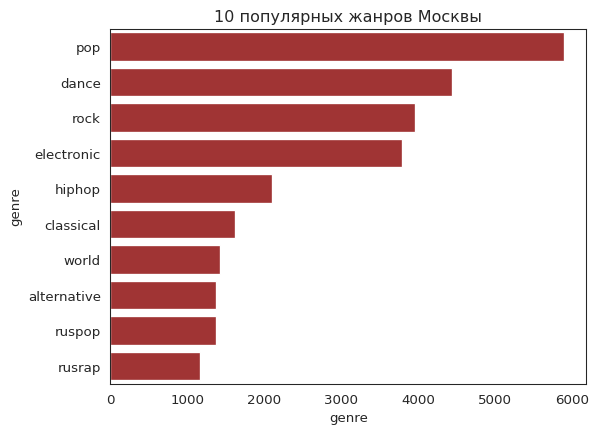

In [42]:
sns.barplot(
    y=top_ten_moscow_genres.index,
    x=top_ten_moscow_genres,
    color="firebrick"
).set_title('10 популярных жанров Москвы')

In [96]:
spb_genres = spb_general.groupby(by='genre')['genre'].count()
spb_genres.sort_values(ascending=False, inplace=True)
top_ten_spb_genres = spb_genres.head(10)

print('10 популярных жанров Петербурга', end='\n\n')
display(top_ten_spb_genres)

10 популярных жанров Петербурга



genre
pop            2431
dance          1932
rock           1879
electronic     1737
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          539
world           515
Name: genre, dtype: int64

Text(0.5, 1.0, '10 популярных жанров Петербурга')

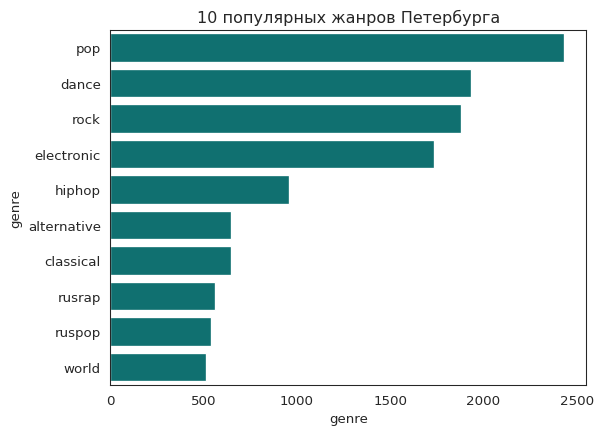

In [44]:
sns.barplot(
    y=top_ten_spb_genres.index,
    x=top_ten_spb_genres,
    color="teal"
).set_title('10 популярных жанров Петербурга')

**Выводы**

Гипотеза частично подтвердилась:

> Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, русский рэп одинаково популярен в Москве и Петербурге. На 10 строчке нашего хит-парада. 


## Итоги исследования

> Вы проверили три гипотезы и установили:
> 
> 1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 
> 
> Первая гипотеза полностью подтвердилась.
> 
> 2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
> * в Москве слушают музыку жанра “world”,
> * в Петербурге — джаз и классику.
> 
> Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.
> 
> 3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.
> 
> Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.
> 
> **На практике исследования содержат проверки статистических гипотез.**
> Из данных одного сервиса не всегда можно сделать вывод о всех жителях города.
> Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных. 
> С методами проверок гипотез вы ещё познакомитесь в следующих темах.

## P.S.


### Сколько пользователь слушет треков в день

Text(0.5, 1.0, 'Прослушиваний в день на пользователя Мск')

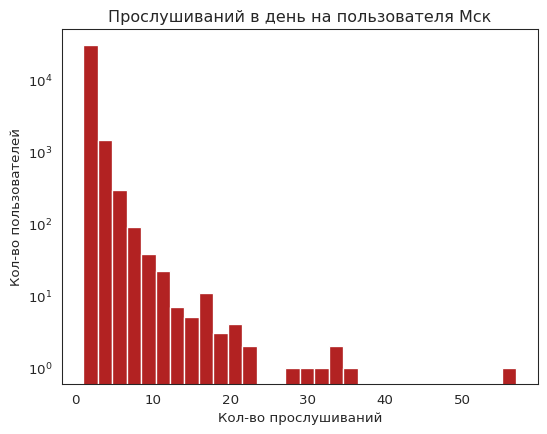

In [53]:
to_plot = msk_df.groupby(
            by=['day', 'user_id']
        )['track_title'].count()

plt.hist(
        to_plot,
        bins=len(to_plot.unique()),
        color='firebrick'
)
plt.xlabel('Кол-во прослушиваний')
plt.ylabel('Кол-во пользователей')
plt.yscale('log')
plt.title('Прослушиваний в день на пользователя Мск')

In [46]:
print('Прослушиваний в день на пользователя Мск:')
print(to_plot.describe())

Прослушиваний в день на пользователя Мск:
count    32437.000000
mean         1.317662
std          1.105553
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         57.000000
dtype: float64


Text(0.5, 1.0, 'Прослушиваний в день на пользователя СПб')

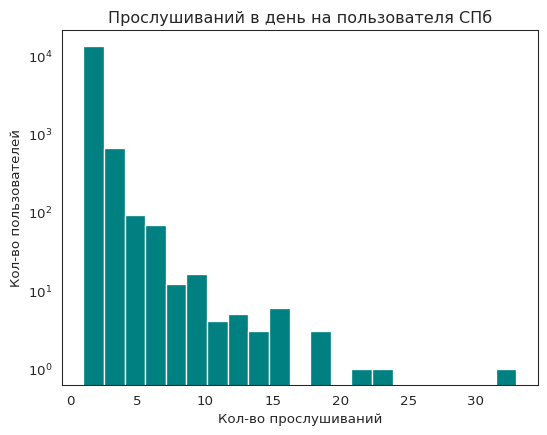

In [51]:
to_plot = spb_df.groupby(
            by=['day', 'user_id']
        )['track_title'].count()

plt.hist(
        to_plot,
        bins=len(to_plot.unique()),
        color='teal'
)
plt.xlabel('Кол-во прослушиваний')
plt.ylabel('Кол-во пользователей')
plt.yscale('log')
plt.title('Прослушиваний в день на пользователя СПб')

In [48]:
print('Прослушиваний в день на пользователя СПб:')
print(to_plot.describe())

Прослушиваний в день на пользователя СПб:
count    13971.000000
mean         1.325030
std          1.024644
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         33.000000
dtype: float64


В Москве за день максимально слушали 57 треков, в Петербурге 33.

При этом `медиана = 1`.

* То есть один трек в день!
* Помнишь ещё — в наборе данных только три дня в неделе!

Похоже, у нас проблемы. Запахло фальсификацией данных.

Точно говорю, ну не может в Петербурге попса быть на первом месте…

**THE END**
To Be Continued...